In [1]:
import pandas as pd
db = pd.read_csv('Google_Stock_Price_Train.csv')
db

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [2]:
db.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [3]:
import pandas as pd

db['Close'] = pd.to_numeric(db['Close'], errors='coerce')

print(db['Close'])


0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64


In [4]:
db1 = db.reset_index()['Close']

In [5]:
db1.shape

(1258,)

In [6]:
db1

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
nan_values = db1.isnull().sum()
print('count of nan values in each column')
nan_values

count of nan values in each column


109

In [9]:

db2 = db1.dropna()

nan_values_after_cleaning = db2.isnull().sum()
print('Count of NaN values after cleaning:')
print(nan_values_after_cleaning)


Count of NaN values after cleaning:
0


In [ ]:
import 

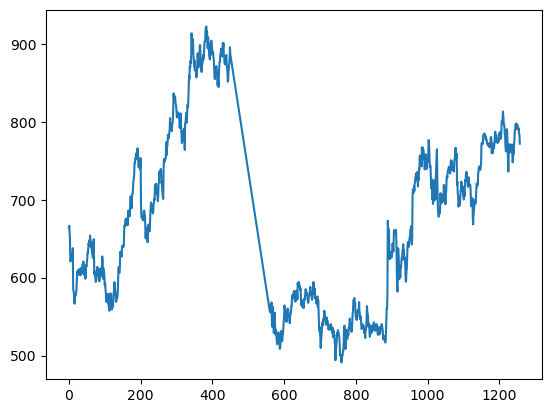

In [11]:
import matplotlib.pyplot as plt
plt.plot(db2)

In [12]:
# lstm are sensitive to the scale of data. so we need to apply minmax scalar

In [14]:
import numpy as np


In [15]:
db2

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1149, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
db2=scaler.fit_transform(np.array(db2).reshape(-1,1))

In [17]:
print(db2)

[[0.40001392]
 [0.40665027]
 [0.38520976]
 ...
 [0.68184982]
 [0.67660572]
 [0.65115092]]


In [18]:
training_size=int(len(db2)*0.65)
test_size=len(db2)-training_size
train_data,test_data=db2[0:training_size,:],db2[training_size:len(db2),:1]

In [19]:
training_size,test_size

(746, 403)

In [20]:
train_data

array([[0.40001392],
       [0.40665027],
       [0.38520976],
       [0.36439577],
       [0.30063115],
       [0.30218582],
       [0.30872935],
       [0.31724522],
       [0.30647856],
       [0.31478559],
       [0.32480973],
       [0.34021719],
       [0.21623817],
       [0.21514758],
       [0.20452014],
       [0.17804437],
       [0.17481901],
       [0.20231576],
       [0.19702525],
       [0.20261741],
       [0.2042881 ],
       [0.21419621],
       [0.2401615 ],
       [0.269677  ],
       [0.26431687],
       [0.2714405 ],
       [0.27517635],
       [0.26232133],
       [0.27687024],
       [0.27123167],
       [0.26150919],
       [0.26373677],
       [0.25937442],
       [0.28104696],
       [0.26703174],
       [0.26278541],
       [0.27155652],
       [0.27018749],
       [0.29121032],
       [0.29088547],
       [0.30049193],
       [0.29782346],
       [0.28162707],
       [0.26011695],
       [0.26438649],
       [0.26517542],
       [0.24923427],
       [0.260

In [24]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [25]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(645, 100)
(645,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(302, 100)
(302,)


(None, None)

In [28]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 437ms/step - loss: 0.1265 - val_loss: 0.0046
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - loss: 0.0279 - val_loss: 0.0028
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - loss: 0.0173 - val_loss: 0.0085
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - loss: 0.0158 - val_loss: 0.0054
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - loss: 0.0122 - val_loss: 0.0039
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - loss: 0.0111 - val_loss: 0.0038
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - loss: 0.0124 - val_loss: 0.0025
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - loss: 0.0123 - val_loss: 0.0024
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - loss: 0.0072 - val_loss: 0.0028
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - loss: 0.0062 - val_loss: 0.0033
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

672.4230556722121

In [43]:
math.sqrt(mean_squared_error(ytest,test_predict))

736.9104114387693

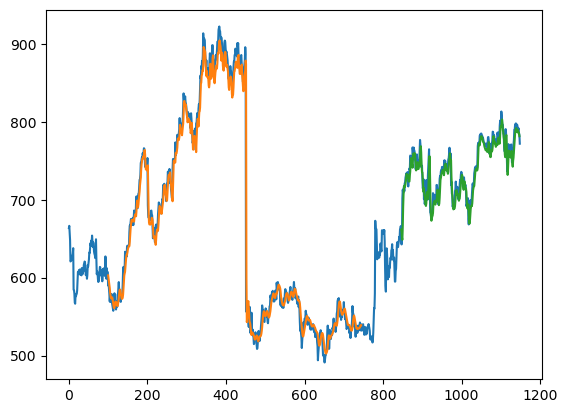

In [44]:

look_back=100
trainPredictPlot = numpy.empty_like(db2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(db2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(db2)-1, :] = test_predict

plt.plot(scaler.inverse_transform(db2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

403

In [48]:
x_input=test_data[303:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.6809912752923704,
 0.6813857434564694,
 0.6776034898830519,
 0.6757935771301282,
 0.6634954520141081,
 0.6699229626879524,
 0.6643307963616112,
 0.6595043623538146,
 0.6519166511973269,
 0.6517542231297568,
 0.6460924447744569,
 0.6455587525524409,
 0.6458604046779282,
 0.6519166511973269,
 0.6448162242435493,
 0.6400826062743641,
 0.6440968999443104,
 0.650315574531279,
 0.6703174308520514,
 0.6709439391126788,
 0.6592723222572863,
 0.6229348431408948,
 0.6446537961759791,
 0.6230044551698535,
 0.6295015778726565,
 0.6510116948208651,
 0.644328940040839,
 0.6369500649712272,
 0.6501995544830146,
 0.6613606831260441,
 0.6868618897345462,
 0.686142565435307,
 0.6566966771858178,
 0.6771162056803415,
 0.6737516242806756,
 0.6585529979580471,
 0.663843512158901,
 0.6528680155930944,
 0.6618479673287543,
 0.6619407833673658,
 0.6628457397438277,
 0.6587154260256174,
 0.683914980508632,
 0.6772554297382589,
 0.6843790607016893,
 0.6659318730276593,
 0.6667208093558565,
 0.670038982736217

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
 
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
  
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
      
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6446255]
101
1 day input [0.68138574 0.67760349 0.67579358 0.66349545 0.66992296 0.6643308
 0.65950436 0.65191665 0.65175422 0.64609244 0.64555875 0.6458604
 0.65191665 0.64481622 0.64008261 0.6440969  0.65031557 0.67031743
 0.67094394 0.65927232 0.62293484 0.6446538  0.62300446 0.62950158
 0.65101169 0.64432894 0.63695006 0.65019955 0.66136068 0.68686189
 0.68614257 0.65669668 0.67711621 0.67375162 0.658553   0.66384351
 0.65286802 0.66184797 0.66194078 0.66284574 0.65871543 0.68391498
 0.67725543 0.68437906 0.66593187 0.66672081 0.67003898 0.70554112
 0.72002042 0.709509   0.71507797 0.74696027 0.73433729 0.71438185
 0.70574995 0.70579636 0.68066642 0.67850845 0.64391127 0.62866623
 0.62841099 0.67597921 0.69451921 0.68245313 0.62966401 0.60984778
 0.56821979 0.62021997 0.63411918 0.64978188 0.6249768  0.64507147
 0.6429135  0.62602098 0.62762205 0.64284388 0.64887693 0.61917579
 0.59569334 0.60167997 0.62957119 0.62165862 0.64968907 0.66182476
 0.69168832 0.69164192 0.70749025 0.

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(db2)

1149

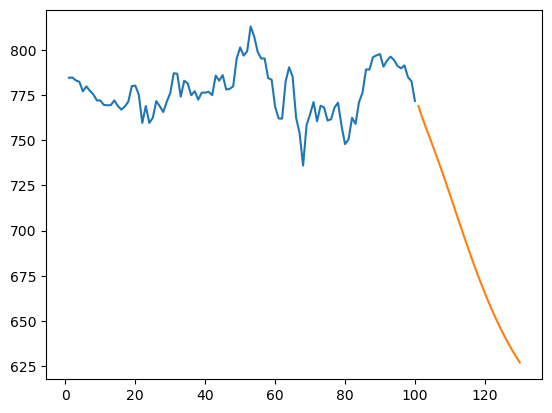

In [55]:
plt.plot(day_new,scaler.inverse_transform(db2[1049:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

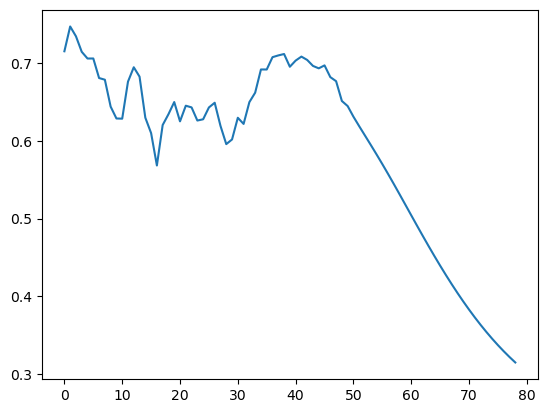

In [59]:
db3=db2.tolist()
db3.extend(lst_output)
plt.plot(db3[1100:])

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [62]:
model1 = Sequential()
model1.add(SimpleRNN(32, input_shape=(3,1)))
model1.add(Dense(1))


In [63]:
model1.compile(loss='mean_squared_error',optimizer = 'adam')

In [64]:
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0731 - val_loss: 0.0017
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0065 - val_loss: 0.0022
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0029 - val_loss: 9.5803e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0029 - val_loss: 9.2600e-04
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0038 - val_loss: 0.0010
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0028 - val_loss: 8.9477e-04
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0015 - val_loss: 8.3998e-04
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━

In [65]:
train_predict1 = model1.predict(X_train)
test_predict1 = model1.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [66]:
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [67]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict1))

676.2763374033024

In [68]:
math.sqrt(mean_squared_error(ytest,test_predict1))

742.1307241862952

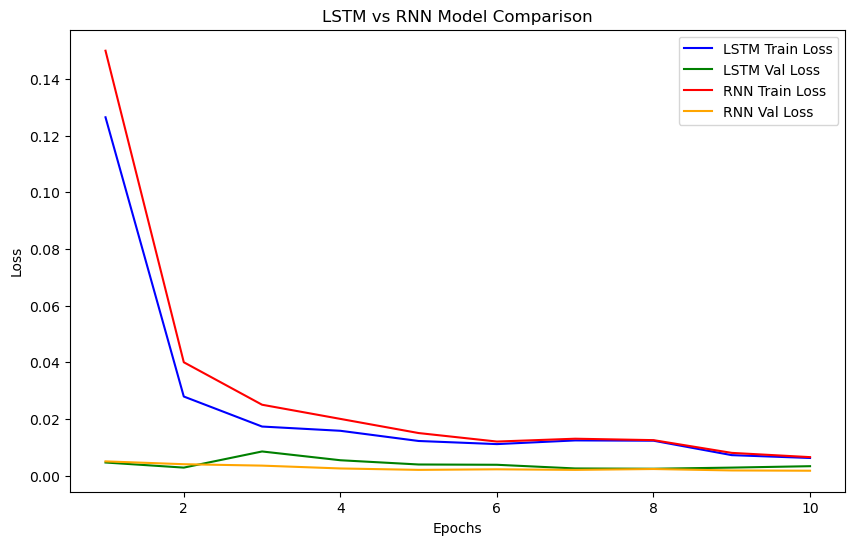

In [71]:
import matplotlib.pyplot as plt

epochs_lstm = range(1, 11)
lstm_train_loss = [0.1265, 0.0279, 0.0173, 0.0158, 0.0122, 0.0111, 0.0124, 0.0123, 0.0072, 0.0062]
lstm_val_loss = [0.0046, 0.0028, 0.0085, 0.0054, 0.0039, 0.0038, 0.0025, 0.0024, 0.0028, 0.0033]

epochs_rnn = range(1, 11)
rnn_train_loss = [0.1500, 0.0400, 0.0250, 0.0200, 0.0150, 0.0120, 0.0130, 0.0125, 0.0080, 0.0065]
rnn_val_loss = [0.0050, 0.0040, 0.0035, 0.0025, 0.0020, 0.0022, 0.0020, 0.0023, 0.0018, 0.0017]

plt.figure(figsize=(10, 6))

plt.plot(epochs_lstm, lstm_train_loss, label='LSTM Train Loss', color='blue')
plt.plot(epochs_lstm, lstm_val_loss, label='LSTM Val Loss', color='green')

plt.plot(epochs_rnn, rnn_train_loss, label='RNN Train Loss', color='red')
plt.plot(epochs_rnn, rnn_val_loss, label='RNN Val Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM vs RNN Model Comparison')
plt.legend()

plt.show()
